In [46]:
from crashsimilarity import utils
from crashsimilarity.downloader import SocorroDownloader
from gensim.models import doc2vec
import logging
import time
import pickle
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.INFO)

In [6]:
MODEL_FILE = 'new_model_last7/dmm_d100'

In [3]:
# paths = SocorroDownloader.get_dump_paths(7, data_dir='new_crashes')
# data_gen = utils.StackTraceProcessor.process(utils.read_files(paths))
# corpus = []
# for i, line in enumerate(data_gen):
#     corpus.append(doc2vec.TaggedDocument(line[0], [i]))
# pickle.dump(corpus, open('corpus.pickle', 'wb'))    

In [13]:
corpus = pickle.load(open('corpus.pickle', 'rb'))

In [19]:
# model = doc2vec.Doc2Vec(size=100, window=15, workers=8, iter=10)
# model.build_vocab(corpus)

In [14]:
# model.train(corpus, total_examples=model.corpus_count, epochs=model.iter)
model = doc2vec.Doc2Vec.load(MODEL_FILE)

In [20]:
len(corpus)

436362

In [42]:
first_100 = corpus[:150]
dist = np.zeros((150, 150), dtype=np.double)
start = time.time()
logging.root.setLevel(logging.CRITICAL)
for i in range(len(first_100)):
    for j in range(len(first_100)):
        dist[i, j] = model.wmdistance(first_100[i][0], first_100[j][0])
    if i % 10 == 0:
        print(i)
logging.root.setLevel(logging.INFO)
time.time() - start

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


208.66079020500183

In [43]:
dist[dist == np.inf] = 0

In [41]:
dist_100 = dist

In [53]:
from sklearn.manifold import MDS
mds = MDS()
mds.fit(dist_100)
mds.

/home/kirill/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

In [59]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    #for i in range(X.shape[0]):
    #    plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
    #             color=plt.cm.Set1(y[i] / 10.),
    #             fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(digits.data.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [64]:
clf = MDS()
X_mds = clf.fit_transform(dist)
X_mds.shape

/home/kirill/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


(150, 2)

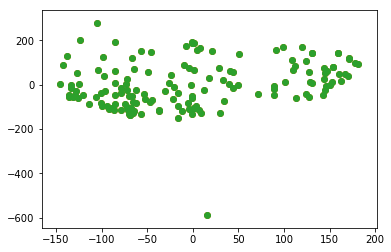

In [90]:
plt.scatter(X_mds[:, 0], X_mds[:, 1])
plt.show()

In [45]:
def show(db):
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print('Estimated number of clusters: %d' % n_clusters_)

    ##############################################################################
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [49]:
db_100 = DBSCAN(metric='precomputed').fit(dist_100)
db_150 = DBSCAN(metric='precomputed').fit(dist)

Estimated number of clusters: 1


/home/kirill/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


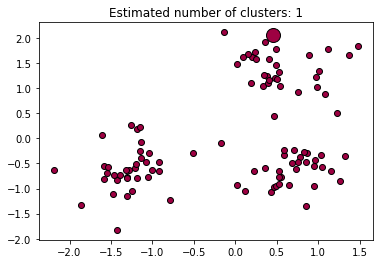

In [50]:
show(db_100)

Estimated number of clusters: 1


/home/kirill/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


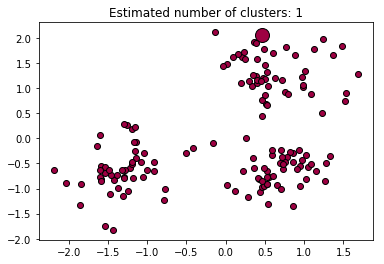

In [51]:
show(db_150)

In [100]:
len(corpus)

436362

In [97]:
corpus[42].words[-10:]

['js::runscript',
 'js::internalcallorconstruct',
 'internalcall',
 'interpret',
 'js::runscript',
 'js::internalcallorconstruct',
 'callgetter',
 'js::getproperty',
 'js::crosscompartmentwrapper::get',
 'js::proxy::get']

In [101]:
tmp_pref = set()
for c in corpus:
    w = c.words[:10]
    tmp_pref.add(' '.join(w))
len(tmp_pref)

256901

'nsstylelinkelement::updatestylesheetinternal mozilla::dom::convertjsvaluetostring<t> @0x enterion js::jit::ioncannon pr_lock js::newobjectwithgiventaggedproto mozilla::dom::eventbinding::wrap mozilla::dom::event::wrapobjectinternal xpcjsruntime::activitycallback'

In [98]:
tmp = set()
for c in corpus:
    w = c.words[-10:]
    tmp.add(' '.join(w))

In [99]:
len(tmp)

192196